#### ADS1 Assignment 3

**Tanvir Ahmed, 20075186**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Using WBGAPI importing World Bank data on climate change

In [2]:
import wbgapi as wb         #importing wbgapi as wb 

# To install this API, please run pip install wbgapi

In [3]:
#             https://data.worldbank.org/indicator/EN.ATM.GHGT.KT.CE

# Indicator ID for Total greenhouse gas emissions (kt of CO2 equivalent) is 'EN.ATM.GHGT.KT.CE'

greenhouse_emission_ind = 'EN.ATM.GHGT.KT.CE' #assigning the ID to a variable

In [4]:
def wb_data(indicator_id):
    """
    This function imports data from the World Bank website for the selected
    indicator and saves as a dataframe in the World Bank data format and it's transposed format. 
    The years are between 1950 and 2021 with 5 years increment.  
    Argument = indicator ID as string
    """
    
    df = wb.data.DataFrame(indicator_id, time=range(1950, 2021, 5))
    
    df.index.name = 'Country'
    df.columns.name = 'Year'
    df.columns = df.columns.str.replace("YR","")
    
    return(df, df.T)

In [5]:
df_CO2 = wb_data(greenhouse_emission_ind)

In [6]:
df_CO2[0].head(5) # The first dataframe in the World Bank format

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
AFW,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [7]:
df_CO2[1].head(5) # The second dataframe with countries as columns

Country,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# The country codes in the dataframes don't make proper sense we need to reset the index with proper country names

# The url below contains the country names with their respective codes

url = 'https://docs.google.com/spreadsheets/d/1-HxLssAd2glfU40FWuccMw8758zrJyon6H6qkMjLeZU/edit#gid=0'

url_readable = url.replace('/edit#gid=', '/export?format=csv&gid=')

country_names = pd.read_csv(url_readable)

country_names.head()

,Country Name,Country Code
0,Aruba,ABW
1,Africa Eastern and Southern,AFE
2,Afghanistan,AFG
3,Africa Western and Central,AFW
4,Angola,AGO


In [9]:
def country_code_to_name(df):
    """
    Takes in a dataframe with  country codes as index and 
    changes the index to country names.
    """
    df.index = country_names['Country Name']
    
    return(df)

In [10]:
country_code_to_name(df_CO2[0])

df_CO2[0].head(5)

Year,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
Country Name,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa Eastern and Southern,NaN,NaN,2.512439e+06,1.908922e+06,2.213255e+06,1.559561e+06,838050.0,895540.0,948360.0,1154760.0,1335490.0,1436770.0,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,15180.0,13480.0,15080.0,17400.0,44910.0,93730.0,NaN
Africa Western and Central,NaN,NaN,6.327455e+05,6.007661e+05,8.132658e+05,6.818932e+05,398170.0,526710.0,553740.0,650720.0,690440.0,805370.0,NaN
Angola,NaN,NaN,NaN,NaN,NaN,NaN,42180.0,48460.0,49590.0,67230.0,84120.0,90620.0,NaN


In [11]:
df_CO2[1].columns = country_names['Country Name']
df_CO2[1].head(5)

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970,NaN,2.512439e+06,NaN,632745.499853,NaN,NaN,NaN,552362.062026,NaN,NaN,...,NaN,NaN,NaN,2.705717e+07,NaN,NaN,NaN,NaN,NaN,NaN
1975,NaN,1.908922e+06,NaN,600766.122089,NaN,NaN,NaN,683966.235399,NaN,NaN,...,NaN,NaN,NaN,2.824575e+07,NaN,NaN,NaN,NaN,NaN,NaN
1980,NaN,2.213255e+06,NaN,813265.777979,NaN,NaN,NaN,927714.236940,NaN,NaN,...,NaN,NaN,NaN,3.279410e+07,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
countries_of_interest = ['Bangladesh', 'Brazil', 'Canada', 'China', 'Ecuador', 'France', 'India', 
                         'Nigeria', 'Russia', 'South Africa', 'Sweden', 'United Kingdom', 'United States']

In [13]:
# China, United States, India, Russia and Brazil are the most CO2 producing countries from the list.

In [158]:
# Constructing a dataframe with climate change indicators of interest for the listed countries.

total_pop = 'SP.POP.TOTL'             # Total population

rural_pop = 'SP.RUR.TOTL.ZS'          # Rural population (% of total population)

urban_pop = 'SP.URB.TOTL.IN.ZS'       # Urban population (% of total population)

forest_area = 'AG.LND.FRST.ZS'        # Forest area (% of land area)

arable_land = 'AG.LND.ARBL.ZS'        # Arable land (% of land area)

manufacturing = 'NV.IND.MANF.ZS'      # Manufacturing, value added (% of GDP)

gdp = 'NY.GDP.MKTP.CD'                # Total GDP (current USD)  

elec_consump = 'EG.USE.ELEC.KH.PC'    # Electric power consumption (kWh per capita)


In [15]:
df_pop = wb_data(total_pop)

country_code_to_name(df_pop[0])

df_total_pop = df_pop[0].loc[countries_of_interest]

#df_total_pop.head()

In [16]:
df_r = wb_data(rural_pop)

country_code_to_name(df_r[0])

df_rural = df_r[0].loc[countries_of_interest]

#df_rural.head()

In [17]:
df_u = wb_data(urban_pop)

country_code_to_name(df_u[0])

df_urban = df_u[0].loc[countries_of_interest]

df_urban.to_csv('urban.csv')

#df_urban

In [18]:
df_f = wb_data(forest_area)

country_code_to_name(df_f[0])

df_forest = df_f[0].loc[countries_of_interest]

#df_forest.drop(['1960','1965','1970','1975','1980','1985'], axis=1).head(5) # removed the years without proper data

In [19]:
df_a = wb_data(arable_land)

country_code_to_name(df_a[0])

df_arable = df_a[0].loc[countries_of_interest]

#df_arable.drop(['1960'], axis=1).head()

In [20]:
df_m = wb_data(manufacturing)

country_code_to_name(df_m[0])

df_manufacturing = df_m[0].loc[countries_of_interest]

#df_manufacturing.head()

In [21]:
df_g = wb_data(gdp)

country_code_to_name(df_g[0])

df_gdp = df_g[0].loc[countries_of_interest]

#df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1).head()

In [159]:
df_gr = wb_data(greenhouse_emission_ind)

country_code_to_name(df_gr[0])

df_greenhouse = df_gr[0].loc[countries_of_interest]

#df_greenhouse

In [160]:
df_elec_consump = wb_data(elec_consump)

country_code_to_name(df_elec_consump[0])

df_electricity = df_elec_consump[0].loc[countries_of_interest]

#df_total_pop.head()

In [23]:
tot_emission = df_CO2[0].loc[countries_of_interest].drop(['1960','1965','1970','1975','1980','1985','2020'], axis=1)

In [24]:
tot_gdp = df_gdp.drop(['1960','1965','1970','1975','1980','1985', '2020'], axis=1)

In [25]:
C = tot_emission*1000*1000 / tot_gdp
C

Year,1990,1995,2000,2005,2010,2015
Country Name,,,,,,
Bangladesh,2.922938,2.717994,2.103250,1.848856,1.352978,0.936033
Brazil,1.520120,0.880945,1.168056,0.996968,0.446588,0.600762
Canada,0.942603,1.002861,0.901966,0.601036,0.416856,0.454819
China,8.929470,5.808798,3.795304,3.147239,1.676285,1.072118
Ecuador,2.219265,1.695256,2.311247,1.247739,0.888501,0.668947
France,0.396122,0.310419,0.372397,0.231717,0.177980,0.176346
India,3.820935,4.045137,3.666906,2.400931,1.530262,1.456393
Nigeria,3.725864,4.920968,2.732230,1.331088,0.649954,0.569306
Russia,6.291951,5.810200,8.449189,3.106108,1.609267,1.815713


In [26]:
"""
# Creating a pie-chart for 2015 emissions data  
df_greenhouse.plot.pie(y='2015', figsize=(10, 8), cmap='Set3')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))
plt.tight_layout()

"""

"\n# Creating a pie-chart for 2015 emissions data  \ndf_greenhouse.plot.pie(y='2015', figsize=(10, 8), cmap='Set3')\nplt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))\nplt.tight_layout()\n\n"

<AxesSubplot:title={'center':'Total GDP (USD)'}, xlabel='Country Name', ylabel='GDP (USD)'>

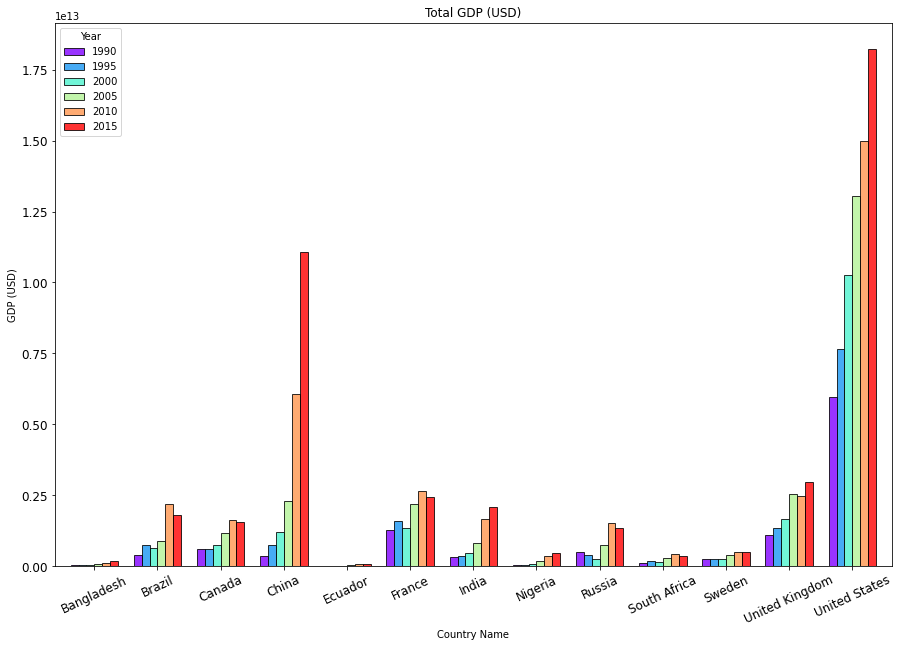

In [27]:
tot_gdp.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='GDP (USD)', fontsize=12, alpha=0.8, 
             stacked=False, width = 0.75, title='Total GDP (USD)', colormap='rainbow', edgecolor='black', rot=25)

<AxesSubplot:title={'center':'Greenhouse gas emission by countries'}, xlabel='Country Name', ylabel='KT of CO2 equivalent'>

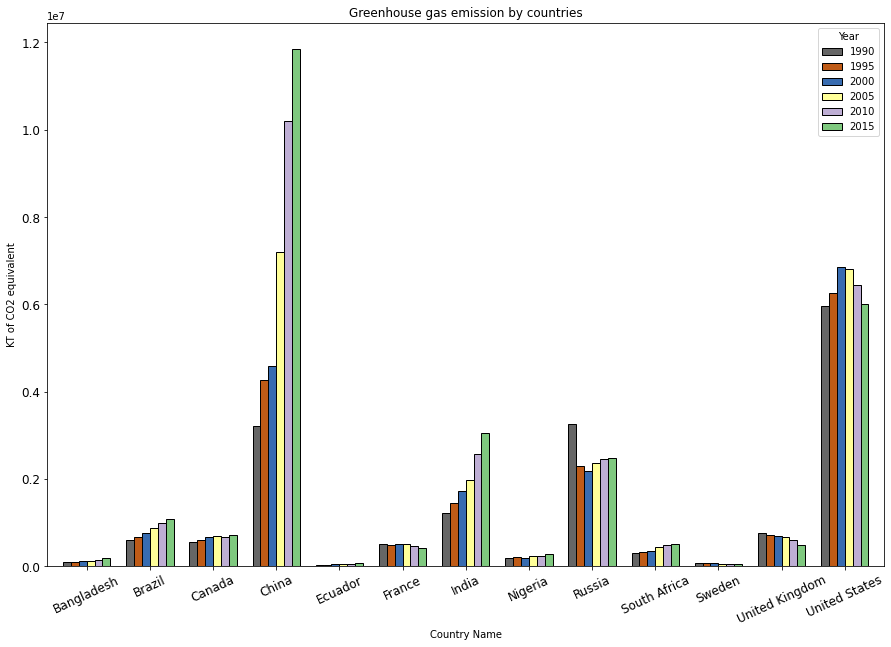

In [28]:
tot_emission.plot(kind='bar', figsize=(15,10), xlabel='Country Name', ylabel='KT of CO2 equivalent', fontsize=12, alpha=1.0, 
                                stacked=False, width = 0.75, title='Greenhouse gas emission by countries', 
                                colormap='Accent_r', edgecolor='black', rot=25)

In [29]:
#plt.scatter(df_urban.drop('World'), df_forest.drop('World'))

In [30]:
tot_emission.corrwith(tot_gdp, axis=1)

Country Name
Bangladesh        0.977238
Brazil            0.871741
Canada            0.753919
China             0.949859
Ecuador           0.960546
France           -0.669921
India             0.983036
Nigeria           0.897058
Russia           -0.008818
South Africa      0.974697
Sweden           -0.889807
United Kingdom   -0.886152
United States     0.056652
dtype: float64

In [31]:
# France, Russia, Sweden and the UK total greenhouse gas emission has negative correlations with the total GDP.
# The US doesn't have any correlation between the two factors.
# The rest of the countries from the list have strong correlations.

In [32]:
df_urban.corrwith(df_forest, axis=1)

Country Name
Bangladesh       -0.952714
Brazil           -0.986499
Canada           -0.969458
China             0.998542
Ecuador          -0.242460
France            0.996876
India             0.974893
Nigeria          -0.994811
Russia            0.772324
South Africa     -0.999853
Sweden            0.720512
United Kingdom    0.949806
United States     0.917218
dtype: float64

In [33]:
"""import scipy.stats as stats
(stats.describe(df_urban.T).mean)

stats.describe(df_urban.T)
"""

'import scipy.stats as stats\n(stats.describe(df_urban.T).mean)\n\nstats.describe(df_urban.T)\n'

In [34]:
df_urban.mean(axis=1)

Country Name
Bangladesh        19.690154
Brazil            70.918462
Canada            77.142308
China             31.790538
Ecuador           51.958077
France            73.910154
India             25.610462
Nigeria           30.475462
Russia            69.118923
South Africa      54.225538
Sweden            82.642462
United Kingdom    79.294308
United States     76.462385
dtype: float64

In [35]:
#df_arable.T.reset_index().plot('Year', countries_of_interest[:], linestyle ='-.', figsize=(14,10), 
                               #title='Arable Land', cmap='tab20')
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [36]:
#df_forest.T.iloc[:, :]

In [37]:
#df_forest.T.reset_index().plot('Year', countries_of_interest, linestyle ='-.', figsize=(12,8), title='Forest Area')

#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [38]:
# The forest area remains more or less same for most of the countries throughout the years except for Brazil and Nigeria.
# Bangladesh and the UK has only about 14% of thier total land area as forests.

In [39]:
df_urban.max(axis=1)

Country Name
Bangladesh        38.177
Brazil            87.073
Canada            81.562
China             61.428
Ecuador           64.166
France            80.975
India             34.926
Nigeria           51.958
Russia            74.754
South Africa      67.354
Sweden            87.977
United Kingdom    83.903
United States     82.664
dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler

df_urban_norm = StandardScaler().fit_transform(df_urban)

In [41]:
#plt.hist(df_urban_norm)

In [42]:
def df_country_specific(country, colormap):
    """
    The function takes in a country name from the countries_of_interest list 
    and returns a heatmap of the variables/features 
    """
    
    x1 = df_rural.loc[country].reset_index().iloc[:, 1]
    x2 = df_urban.loc[country].reset_index().iloc[:, 1]
    x3 = df_forest.loc[country].reset_index().iloc[:, 1]
    x4 = df_arable.loc[country].reset_index().iloc[:, 1]
    x5 = df_manufacturing.loc[country].reset_index().iloc[:, 1]
    x6 = df_gdp.loc[country].reset_index().iloc[:, 1]
    x7 = df_greenhouse.loc[country].reset_index().iloc[:, 1]
    
    df_country = pd.DataFrame([x1, x2, x3, x4, x5, x6, x7])
    df_country.index = ['Rural population (% of total)', 'Urban population (% of total)', 'Forest area', 'Arable land', 
                        'Manufacturing revenue', 'GDP', 'Greenhouse emission']
    df_country.columns = ['1960','1965', '1970', '1975', '1980','1985', '1990', '1995','2000', '2005', '2010', '2015', '2020'] 
    
    plt.figure(figsize=(14,10))
    
    sns.heatmap(df_country.T.corr(), annot=True, cmap=colormap, alpha=0.9, linecolor='black', linewidths = 0.05)
    
    plt.suptitle(country, x=0.45, y=0.95)
    
    plt.show()
    
    return ()

In [43]:
#df_china = df_country_specific('China', 'Set2')

In [44]:
#df_country_specific('Brazil', 'mako')

In [45]:
#df_bangladesh = df_country_specific('Bangladesh', 'tab10')

--------------------------------------------------------------------------------------------------

In [46]:
df_forest.columns

Index(['1960', '1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000',
       '2005', '2010', '2015', '2020'],
      dtype='object', name='Year')

In [47]:
df_forest.columns[1:]

Index(['1965', '1970', '1975', '1980', '1985', '1990', '1995', '2000', '2005',
       '2010', '2015', '2020'],
      dtype='object', name='Year')

In [48]:
df_forest.iloc[:, 6]

Country Name
Bangladesh        14.752478
Brazil            70.458021
Canada            38.845512
China             16.673325
Ecuador           52.854392
France            26.363945
India             21.504848
Nigeria           29.124905
Russia            49.356465
South Africa      14.955271
Sweden            68.389628
United Kingdom    11.482660
United States     33.022308
Name: 1990, dtype: float64

In [49]:
df_forest[['1980', '1985', '1990', '1995']]

Year,1980,1985,1990,1995
Country Name,,,,
Bangladesh,NaN,NaN,14.752478,14.752470
Brazil,NaN,NaN,70.458021,68.196190
Canada,NaN,NaN,38.845512,38.819247
China,NaN,NaN,16.673325,17.726847
Ecuador,NaN,NaN,52.854392,51.225816
France,NaN,NaN,26.363945,27.141934
India,NaN,NaN,21.504848,22.119172
Nigeria,NaN,NaN,29.124905,28.228384
Russia,NaN,NaN,49.356465,49.401052


In [50]:
new_test_df = df_forest[['1980', '1985', '1990', '1995']].copy()
new_test_df

Year,1980,1985,1990,1995
Country Name,,,,
Bangladesh,NaN,NaN,14.752478,14.752470
Brazil,NaN,NaN,70.458021,68.196190
Canada,NaN,NaN,38.845512,38.819247
China,NaN,NaN,16.673325,17.726847
Ecuador,NaN,NaN,52.854392,51.225816
France,NaN,NaN,26.363945,27.141934
India,NaN,NaN,21.504848,22.119172
Nigeria,NaN,NaN,29.124905,28.228384
Russia,NaN,NaN,49.356465,49.401052


In [51]:
popt = [4e8, 0.01]

In [52]:
popt[1]

0.01

In [53]:
print(*popt)

400000000.0 0.01


In [54]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    mean_val = np.mean(array)
    min_val = np.min(array)
    max_val = np.max(array)
    
    #scaled = (array-min_val) / (max_val-min_val)
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    df_norm = df.copy()
    # iterate over all columns
    for col in df.columns[:]:     
        df_norm[col] = norm(df[col])
        
    return df_norm

In [55]:
df_greenhouse_norm = norm_df(df_greenhouse)[['1990', '1995', '2000', '2005', '2010', '2015']]

<AxesSubplot:xlabel='1990', ylabel='2015'>

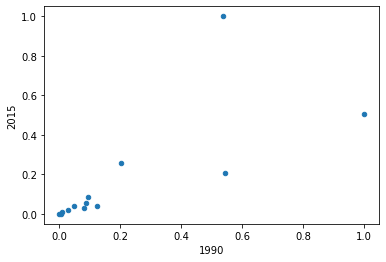

In [56]:
df_greenhouse_norm.plot('1990', '2015', kind='scatter')

In [57]:
df_urban_norm2 = norm_df(df_urban)[['1990', '1995', '2000', '2005', '2010', '2015']]

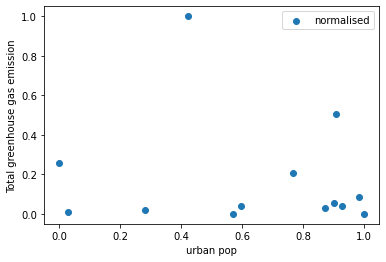

In [58]:
plt.figure()

plt.scatter(df_urban_norm2['2015'], df_greenhouse_norm['2015'], label='normalised')

plt.xlabel('urban pop')
plt.ylabel('Total greenhouse gas emission')

plt.legend()

plt.show()

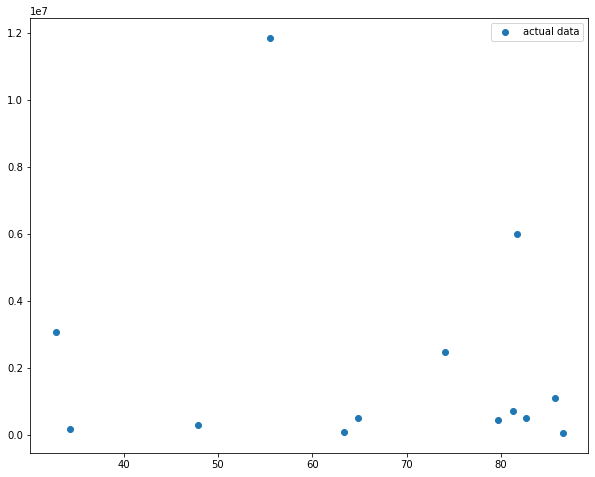

In [59]:
plt.figure(figsize=(10,8))

plt.scatter(df_urban['2015'], df_greenhouse['2015'], label='actual data')

plt.legend()

plt.show()

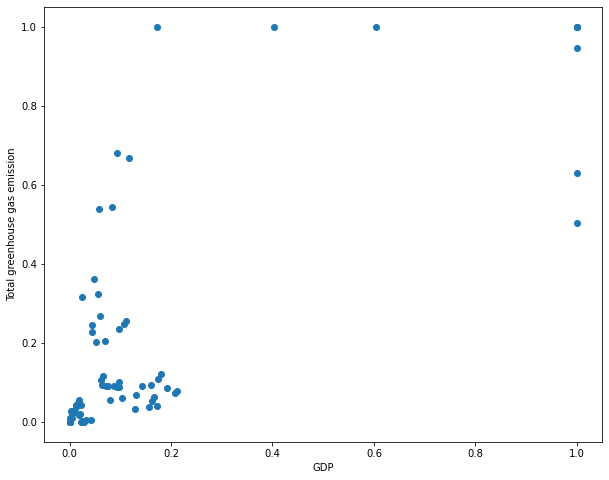

In [60]:
plt.figure(figsize=(10,8))

#plt.scatter(norm_df(df_gdp)['2015'], df_greenhouse_norm['2015'], label='2015')
#plt.scatter(norm_df(df_gdp)['2010'], df_greenhouse_norm['2010'], label='2010')
#plt.scatter(norm_df(df_gdp)['2005'], df_greenhouse_norm['2005'], label='2005')
plt.scatter(norm_df(df_gdp)[['1990', '1995', '2000', '2005', '2010', '2015']], 
            df_greenhouse_norm[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('GDP')
plt.ylabel('Total greenhouse gas emission')

#plt.legend(loc=0)

plt.show()

In [61]:
norm_df(df_gdp).shape

(13, 13)

In [62]:
#df_CO2[0].plot(df_CO2[0].columns, df_CO2[['1990', '1995', '2000', '2005', '2010', '2015']], kind='scatter')

<AxesSubplot:xlabel='Country Name'>

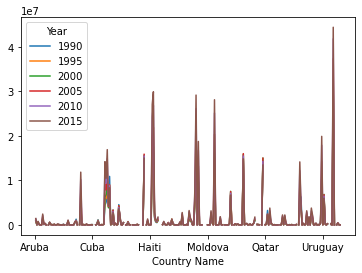

In [63]:
df_CO2[0][['1990', '1995', '2000', '2005', '2010', '2015']].plot()

In [64]:
"""plt.figure()

plt.scatter(['1990', '1995', '2000', '2005', '2010', '2015'], df_CO2[1][['1990', '1995', '2000', '2005', '2010', '2015']])

plt.show()

"""

"plt.figure()\n\nplt.scatter(['1990', '1995', '2000', '2005', '2010', '2015'], df_CO2[1][['1990', '1995', '2000', '2005', '2010', '2015']])\n\nplt.show()\n\n"

In [65]:
#df_CO2[1].plot(figsize=(10,8))
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

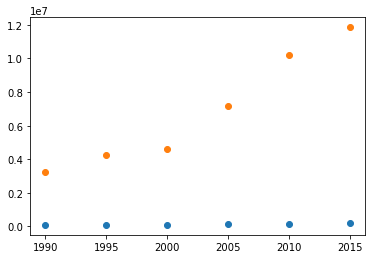

In [66]:
plt.scatter(df_CO2[1].index, df_CO2[1]['Bangladesh'], label='Bangladesh')
plt.scatter(df_CO2[1].index, df_CO2[1]['China'], label='Bangladesh')

In [67]:
countries_of_interest

['Bangladesh',
 'Brazil',
 'Canada',
 'China',
 'Ecuador',
 'France',
 'India',
 'Nigeria',
 'Russia',
 'South Africa',
 'Sweden',
 'United Kingdom',
 'United States']

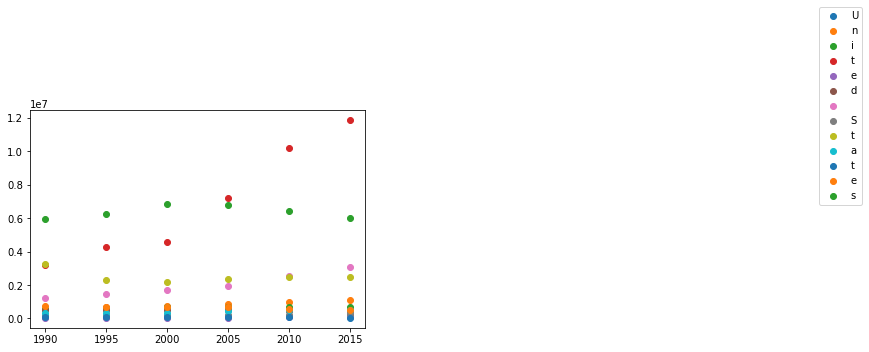

In [68]:
for country in countries_of_interest:
    plt.scatter(df_CO2[1].index, df_CO2[1][country], label='country')
    plt.legend(country, bbox_to_anchor=(1.5, 0.5, 1, 1))
    plt.show

In [69]:
#C['2015'].plot(figsize=(12,10))

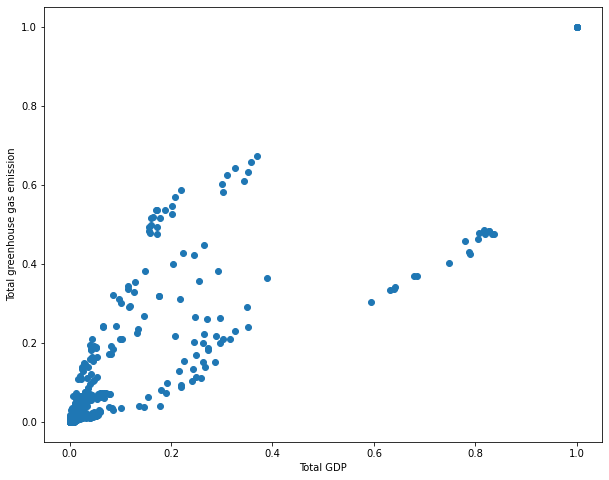

In [70]:
plt.figure(figsize=(10,8))

plt.scatter(norm_df(df_g[0])[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_gr[0])[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('Total GDP')
plt.ylabel('Total greenhouse gas emission')

#plt.legend(loc=0)

plt.show()

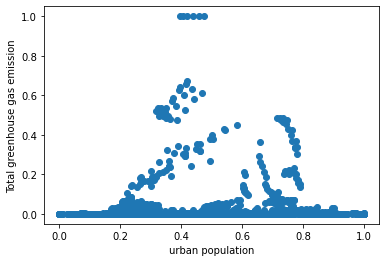

In [71]:
plt.figure()

plt.scatter(norm_df(df_u[0])[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_gr[0])[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('urban population')
plt.ylabel('Total greenhouse gas emission')

plt.show()

In [72]:
# Removing entries which are aggregate or not to be analysed for this work

url2 = 'https://docs.google.com/spreadsheets/d/1VXxnOpxxKcMdfitckG6jFwX3YjNg5dO8e8Gr3hpaaNs/edit#gid=0'

url_readable2 = url2.replace('/edit#gid=', '/export?format=csv&gid=')

country_names_to_exclude = pd.read_csv(url_readable2)

#list(country_names_to_exclude['Country Name'])

In [161]:

df_urban_x = df_u[0].drop(list(country_names_to_exclude['Country Name']))

df_green_x = df_gr[0].drop(list(country_names_to_exclude['Country Name']))

df_gdp_x = df_g[0].drop(list(country_names_to_exclude['Country Name']))

df_total_pop_x = df_pop[0].drop(list(country_names_to_exclude['Country Name']))#

df_urban_x = df_u[0].drop(list(country_names_to_exclude['Country Name']))

df_arable_x = df_a[0].drop(list(country_names_to_exclude['Country Name']))

df_electricity_x = df_elec_consump[0].drop(list(country_names_to_exclude['Country Name']))


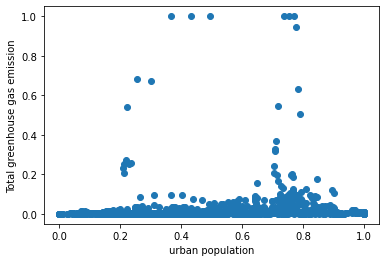

In [74]:
plt.figure()

plt.scatter(norm_df(df_urban_x)[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_green_x)[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('urban population')
plt.ylabel('Total greenhouse gas emission')

plt.show()

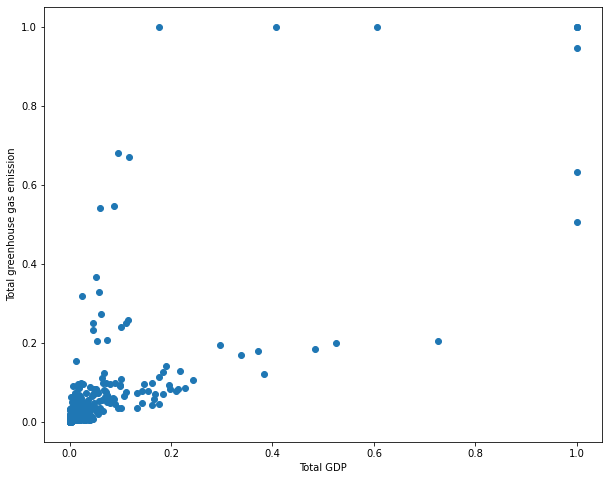

In [75]:
plt.figure(figsize=(10,8))

plt.scatter(norm_df(df_gdp_x)[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_green_x)[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('Total GDP')
plt.ylabel('Total greenhouse gas emission')

plt.show()

In [76]:
df_abc = pd.DataFrame()

#df_abc[['1990', '1995', '2000', '2005', '2010', '2015']] = norm_df(df_gdp_x)[['1990', '1995', '2000', '2005', '2010', '2015']]

#df_abc [['GDP 2015', 'CO2 2015']] = norm_df(df_gdp_x)['2015'],norm_df(df_green_x)['2015']

df_abc['GDP 2015'] = norm_df(df_gdp_x)['2015']
df_abc['CO2 2015'] = norm_df(df_green_x)['2015']

<AxesSubplot:xlabel='GDP 2015', ylabel='CO2 2015'>

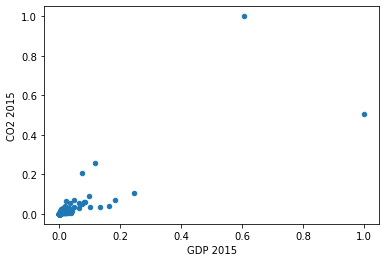

In [77]:
df_abc.plot('GDP 2015', 'CO2 2015', 'scatter')

In [78]:
df_abc

,GDP 2015,CO2 2015
Country Name,,
Aruba,0.000161,NaN
Afghanistan,0.001047,0.007902
Angola,0.006369,0.007640
Albania,0.000622,0.000829
United Arab Emirates,0.019635,0.021319
...,...,...
Kosovo,0.000343,NaN
"Yemen, Rep.",0.002325,0.002195
South Africa,0.019008,0.042251


In [79]:
#df_vvv = pd.DataFrame()

#df_vvv['Population 2015'], df_vvv['Total GDP 2015 (USD)'], df_vvv['Total CO2 2015 (KT)'] = df_total_pop_x['2015'], df_gdp_x['2015'], df_green_x['2015']

In [167]:

df_cluster_test = pd.DataFrame()

df_cluster_test['Population 2015'] = df_total_pop_x['2015']

df_cluster_test['Total GDP 2015 (USD)'] = df_gdp_x['2015']

df_cluster_test['Total CO2 2015 (KT)'] = df_green_x['2015']

df_cluster_test['Urban population 2015'] = df_total_pop_x['2015']* df_urban_x['2015']/100

df_cluster_test['Arable land 2015'] = df_arable_x['2015']

df_cluster_test['Electricity consumption 2010'] = df_electricity_x['2010']


In [168]:
df_cluster_test = df_cluster_test.dropna(subset=['Total CO2 2015 (KT)']).copy()

In [169]:
df_cluster_test['Total GDP 2015 (USD)'] /= df_cluster_test['Population 2015']
df_cluster_test['Total CO2 2015 (KT)'] /= df_cluster_test['Population 2015']

In [170]:
df_cluster_test

,Population 2015,Total GDP 2015 (USD),Total CO2 2015 (KT),Urban population 2015,Arable land 2015,Electricity consumption 2010
Country Name,,,,,,
Afghanistan,34413603.0,556.007221,0.002724,8.535606e+06,11.893821,NaN
Angola,27884380.0,4166.979833,0.003250,1.769152e+07,3.930376,206.454402
Albania,2880703.0,3952.802538,0.003419,1.654503e+06,22.448905,1943.343354
United Arab Emirates,9262896.0,38663.400503,0.027297,7.935894e+06,0.620952,10609.944002
Argentina,43131966.0,13789.060425,0.008406,3.946704e+07,14.323873,2877.652653
...,...,...,...,...,...,...
Samoa,193510.0,4071.926959,0.003204,3.660048e+04,11.469965,NaN
"Yemen, Rep.",26497881.0,1601.830063,0.000983,9.215168e+06,2.154668,254.849372
South Africa,55386369.0,6259.839681,0.009047,3.590588e+07,9.892094,4542.596206


<AxesSubplot:xlabel='GDP per capita', ylabel='CO2 emission per capita (KT)'>

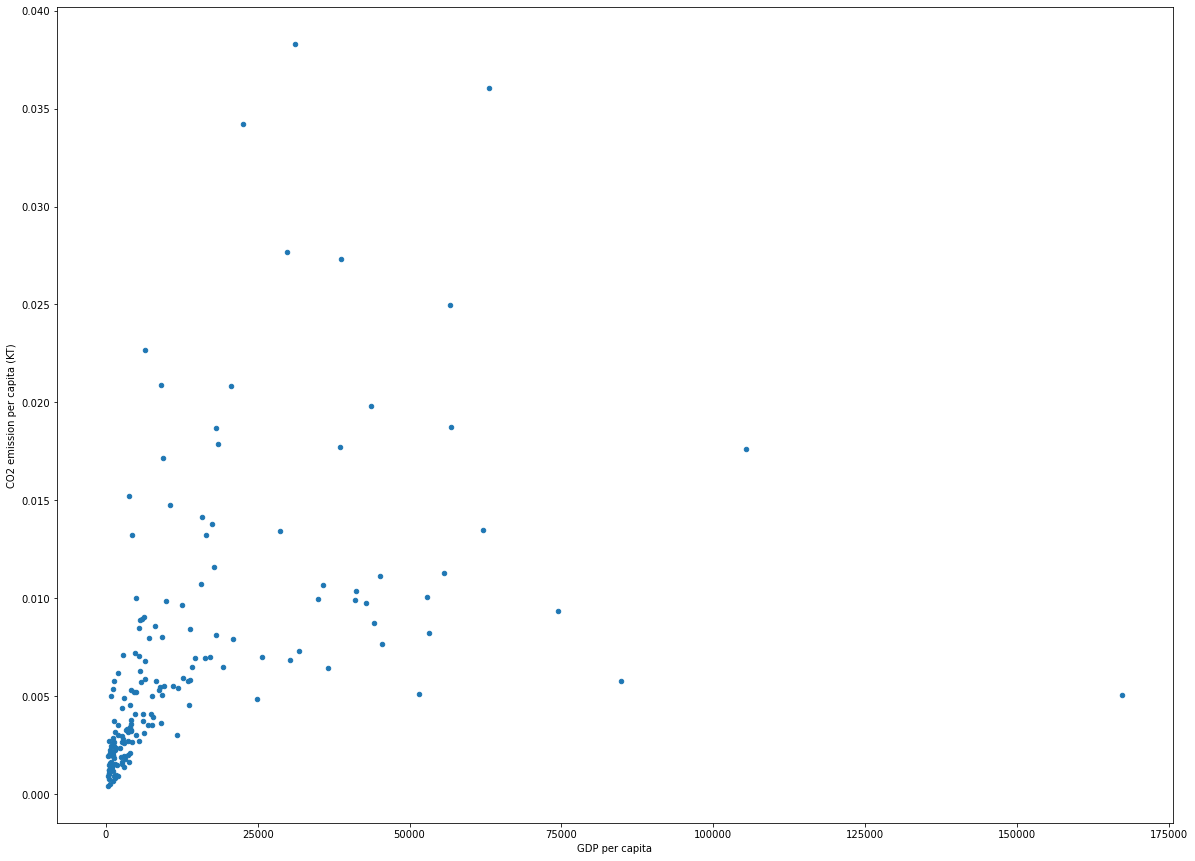

In [84]:
df_cluster_test.plot('Total GDP 2015 (USD)', 'Total CO2 2015 (KT)', kind='scatter', xlabel = 'GDP per capita',
                    ylabel = 'CO2 emission per capita (KT)', figsize=(20,15))

In [85]:
#norm_df(df_cluster_test).plot('Total GDP 2015 (USD)', 'Total CO2 2015 (KT)', kind='scatter', figsize=(10,8), )

In [171]:
A = norm_df(df_cluster_test)

<AxesSubplot:xlabel='Total GDP 2015 (USD)', ylabel='Total CO2 2015 (KT)'>

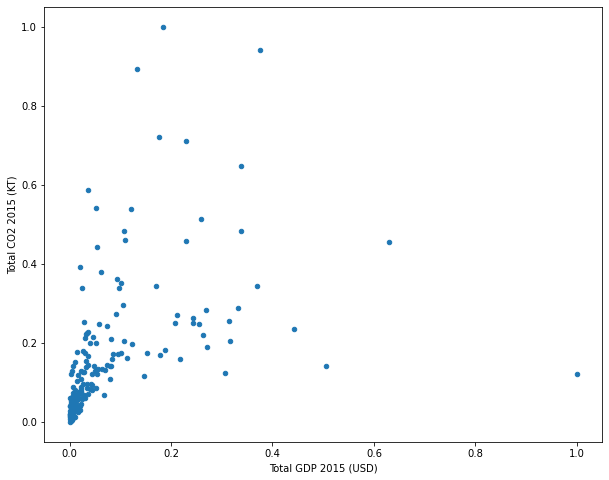

In [172]:
A.plot('Total GDP 2015 (USD)', 'Total CO2 2015 (KT)', kind='scatter', figsize=(10,8))

<AxesSubplot:xlabel='Urban population 2015', ylabel='Total CO2 2015 (KT)'>

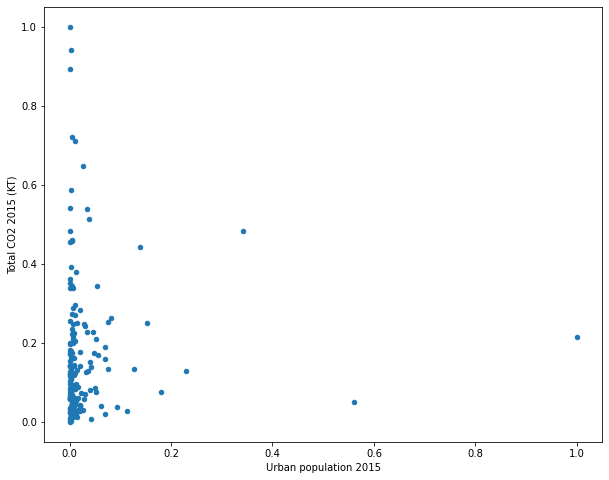

In [88]:
A.plot('Urban population 2015', 'Total CO2 2015 (KT)', kind='scatter', figsize=(10,8))

In [89]:
len(A[(A['Total GDP 2015 (USD)'] < 0.3) & (A['Total GDP 2015 (USD)'] > 0.2)])

12

In [90]:
len(A[(A['Total GDP 2015 (USD)'] < 0.05) & (A['Total GDP 2015 (USD)'] > 0.03)])

22

In [91]:
len(A[(A['Total GDP 2015 (USD)'] < 0.3) & (A['Total CO2 2015 (KT)'] > 0.2)])

39

<AxesSubplot:xlabel='Urban population 2015', ylabel='Total CO2 2015 (KT)'>

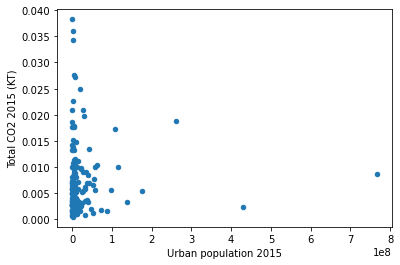

In [92]:
df_cluster_test.plot('Urban population 2015', 'Total CO2 2015 (KT)', kind='scatter')

In [93]:
#df_cluster_test.plot('Population 2015', 'Total CO2 2015 (KT)', kind='scatter', figsize = (20,15))

In [94]:
df_cluster_test['Population 2015'].sort_values(ascending=False)

Country Name
China            1.379860e+09
India            1.310152e+09
United States    3.207390e+08
Indonesia        2.583833e+08
Brazil           2.044718e+08
                     ...     
Liechtenstein    3.746500e+04
Palau            1.766500e+04
Tuvalu           1.109900e+04
Nauru            1.037400e+04
Eritrea                   NaN
Name: Population 2015, Length: 178, dtype: float64

<AxesSubplot:xlabel='Total CO2 2015 (KT)', ylabel='Total GDP 2015 (USD)'>

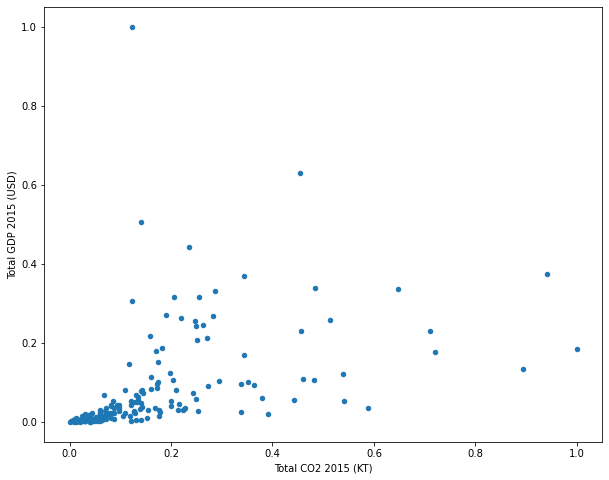

In [95]:
A.plot('Total CO2 2015 (KT)', 'Total GDP 2015 (USD)', kind='scatter', figsize=(10,8))

In [173]:
A.dropna(axis=0, inplace=True)

<AxesSubplot:xlabel='Total CO2 2015 (KT)', ylabel='Total GDP 2015 (USD)'>

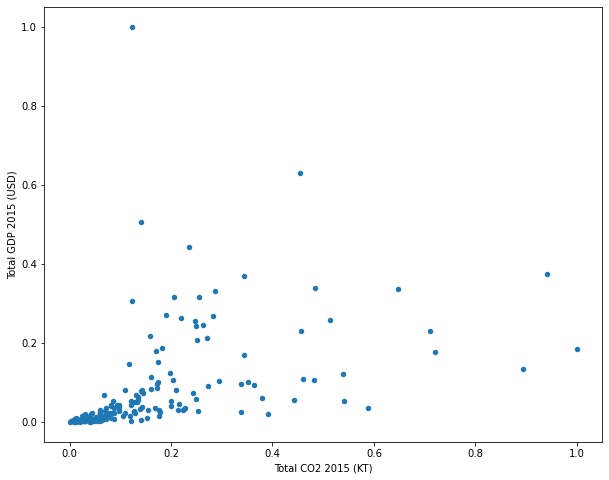

In [142]:
A.plot('Total CO2 2015 (KT)', 'Total GDP 2015 (USD)', kind='scatter', figsize=(10,8))

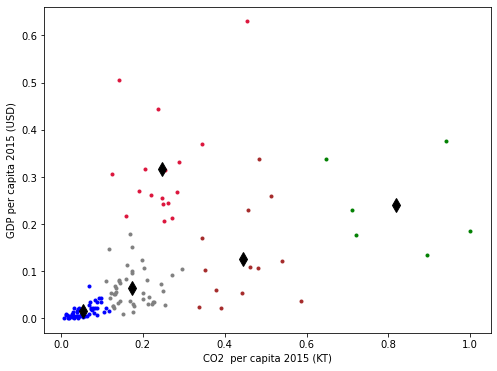

In [174]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters=5)

# extract columns for fitting
df_fit = A[['Total CO2 2015 (KT)', 'Total GDP 2015 (USD)']].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(8.0,6.0))

col = ["blue", "crimson", "green", "grey", "brown"]
for l in range(5):     # loop over the different labels
    plt.plot(df_fit['Total CO2 2015 (KT)'][labels==l], df_fit['Total GDP 2015 (USD)'][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(5):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("CO2  per capita 2015 (KT)")
plt.ylabel("GDP per capita 2015 (USD)")
plt.show()

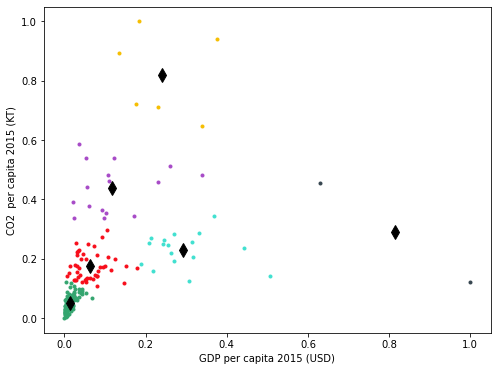

In [156]:
kmeans = cluster.KMeans(n_clusters=6)

# extract columns for fitting
df_fit_2 = A[['Total GDP 2015 (USD)', 'Total CO2 2015 (KT)']].copy()
kmeans.fit(df_fit_2)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(8.0, 6.0))

col = ["#34A56F", "#F6BE00", "#40E0D0", "#F70D1A", "#A74AC7", "#36454F"]
for l in range(6):     # loop over the different labels
    plt.plot(df_fit['Total GDP 2015 (USD)'][labels==l], df_fit['Total CO2 2015 (KT)'][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(6):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("GDP per capita 2015 (USD)")
plt.ylabel("CO2  per capita 2015 (KT)")
plt.show()

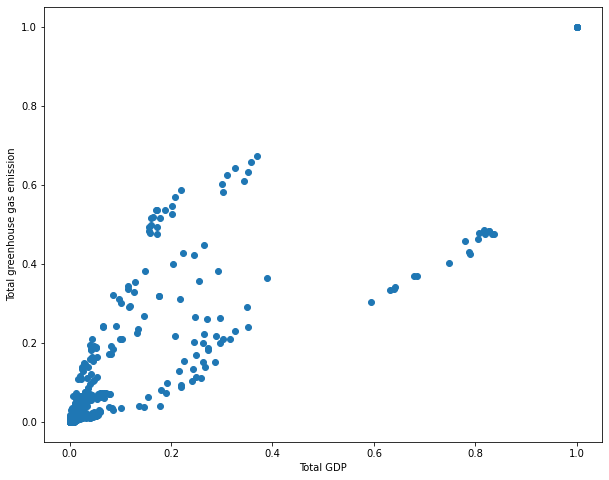

In [100]:
plt.figure(figsize=(10,8))

plt.scatter(norm_df(df_g[0])[['1990', '1995', '2000', '2005', '2010', '2015']], 
            norm_df(df_gr[0])[['1990', '1995', '2000', '2005', '2010', '2015']])

plt.xlabel('Total GDP')
plt.ylabel('Total greenhouse gas emission')

#plt.legend(loc=0)

plt.show()

In [101]:
"""
df_fit = [norm_df(df_g[0])['2015'].dropna, norm_df(df_gr[0])['2015']].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(norm_df(df_g[0])['2015'][labels==l], 
             norm_df(df_gr[0])['2015'][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, marker="o", markersize=10)
    
plt.xlabel("Total GDP")
plt.ylabel("Total greenhouse gas emission")
plt.show()

"""

'\ndf_fit = [norm_df(df_g[0])[\'2015\'].dropna, norm_df(df_gr[0])[\'2015\']].copy()\nkmeans.fit(df_fit)     \n\n# extract labels and cluster centres\nlabels = kmeans.labels_\ncen = kmeans.cluster_centers_\n\n# plot using the labels to select colour\nplt.figure(figsize=(5.0,5.0))\n\ncol = ["blue", "red", "green", "magenta"]\nfor l in range(4):     # loop over the different labels\n    plt.plot(norm_df(df_g[0])[\'2015\'][labels==l], \n             norm_df(df_gr[0])[\'2015\'][labels==l], "o", markersize=3, color=col[l])\n    \n# show cluster centres\nfor ic in range(4):\n    xc, yc = cen[ic,:]\n    plt.plot(xc, yc, marker="o", markersize=10)\n    \nplt.xlabel("Total GDP")\nplt.ylabel("Total greenhouse gas emission")\nplt.show()\n\n'

<AxesSubplot:xlabel='Population 2015', ylabel='Arable land 2015'>

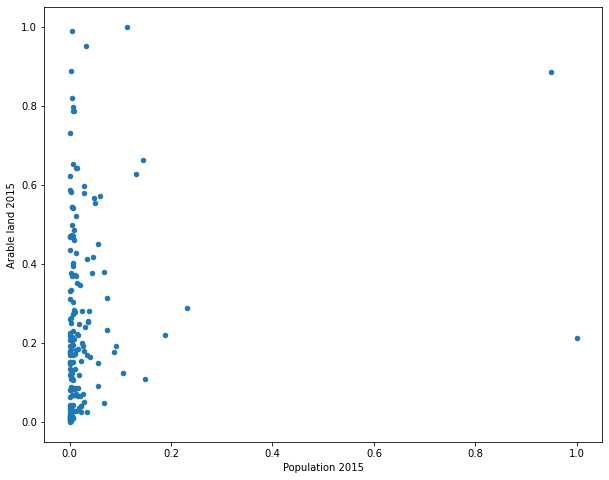

In [150]:
A.plot('Population 2015', 'Arable land 2015', kind='scatter', figsize=(10,8))

In [175]:
A

,Population 2015,Total GDP 2015 (USD),Total CO2 2015 (KT),Urban population 2015,Arable land 2015,Electricity consumption 2010
Country Name,,,,,,
Angola,0.020201,0.023121,0.074560,0.023095,0.064808,0.003538
Albania,0.002080,0.021839,0.079037,0.002153,0.377016,0.037320
United Arab Emirates,0.006705,0.229677,0.709976,0.010356,0.009014,0.205880
Argentina,0.031251,0.080736,0.210800,0.051529,0.240034,0.055492
Armenia,0.002113,0.019770,0.072323,0.002403,0.263070,0.033098
...,...,...,...,...,...,...
Vietnam,0.067157,0.010656,0.082011,0.040908,0.379303,0.019409
"Yemen, Rep.",0.019196,0.007762,0.014664,0.012026,0.034871,0.004480
South Africa,0.040132,0.035653,0.227746,0.046879,0.165318,0.087874


<AxesSubplot:xlabel='Electricity consumption 2010', ylabel='Population 2015'>

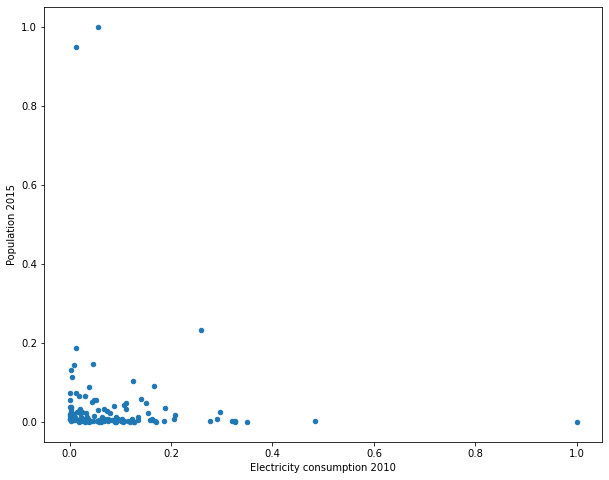

In [177]:
A.plot('Electricity consumption 2010', 'Population 2015', kind='scatter', figsize=(10,8))